In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [22]:
df = pd.read_csv('../data/anonymized_bsc_dataPVZ.csv')

In [15]:
df

,Sttr Term,course_#,course_title,Sttr Student Load,Sttr Stu Credits,Sttr Attempted Cred,Sttr Stu Final Grades,Sttr Cmpl Cred,Sttr Term Gpa,faculty,...,FA5 Enr,FA5 Class,FA5 Major,FA6 Enr,FA6 Class,FA6 Major,Graduated,Grad Term,Grad Year,Grad Major
0,15/SP,DA 101 A,Basic Ballet,F,0.5,3.0,W,3.0,3.667,Melissa Turnage,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
1,15/SP,HI 155 A-ES,Reforming America,F,1.0,NaN,A-,3.0,3.667,Victoria Ott,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
2,15/SP,PL 200 A-CI,Ethical Choice,F,1.0,NaN,B+,3.0,3.667,William Myers,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
3,15/SP,IDS 200 A-CI,Intro to Human Rights (GP),F,1.0,NaN,A,3.0,3.667,Sandra Sprayberry,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
4,15/WI,GEN E299 49,Exploration Project,F,1.0,1.0,S,1.0,0.000,Vincent Gawronski,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51537 entries, 0 to 51536
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sttr Term              51518 non-null  object 
 1   course_#               51518 non-null  object 
 2   course_title           51518 non-null  object 
 3   Sttr Student Load      51417 non-null  object 
 4   Sttr Stu Credits       51479 non-null  float64
 5   Sttr Attempted Cred    46383 non-null  float64
 6   Sttr Stu Final Grades  51518 non-null  object 
 7   Sttr Cmpl Cred         51417 non-null  float64
 8   Sttr Term Gpa          51417 non-null  float64
 9   faculty                51478 non-null  object 
 10  alt_id                 51518 non-null  float64
 11  Cohort                 51537 non-null  object 
 12  SP1 Enr                50912 non-null  object 
 13  SP1 Class              50912 non-null  float64
 14  SP1 Major              40420 non-null  object 
 15  FA

In [8]:
df.columns

Index(['Sttr Term', 'course_#', 'course_title', 'Sttr Student Load',
       'Sttr Stu Credits', 'Sttr Attempted Cred', 'Sttr Stu Final Grades',
       'Sttr Cmpl Cred', 'Sttr Term Gpa', 'faculty', 'alt_id', 'Cohort',
       'SP1 Enr', 'SP1 Class', 'SP1 Major', 'FA2 Enr', 'FA2 Class',
       'FA2 Major', 'FA3 Enr', 'FA3 Class', 'FA3 Major', 'FA4 Enr',
       'FA4 Class', 'FA4 Major', 'FA5 Enr', 'FA5 Class', 'FA5 Major',
       'FA6 Enr', 'FA6 Class', 'FA6 Major', 'Graduated', 'Grad Term',
       'Grad Year', 'Grad Major'],
      dtype='object')

In [13]:
grade_compare = df.groupby(['Cohort', 'Graduated'])['Sttr Term Gpa'].mean()
grade_compare

Cohort  Graduated
14/FA   N            2.376726
        Y            3.187866
15/FA   N            2.605404
        Y            3.164591
16/FA   N            2.725342
        Y            3.262038
17/FA   N            2.503164
        Y            3.418876
Name: Sttr Term Gpa, dtype: float64

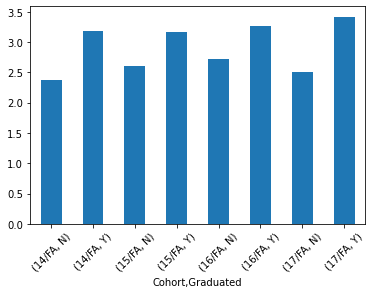

In [17]:
# plot multiple groupby (cohort and graduated)
grade_compare.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [19]:
degree_compare = df.groupby(['Grad Major'])['Grad Year'].count()
degree_compare

Grad Major
Accounting                             1877
Applied Computer Science                342
Applied Computer Sciencee                65
Architectural Studies                    78
Art - Studio                            837
Art History                              38
Art-Art History                         206
Asian Studies                           199
Biology                                4131
Business Administration                6049
Chemistry                              1150
Creative & Applied Computing            130
Economics                               494
Elem/Collaborative Education           1146
English                                 760
Global and Comparative Studies          284
Health Sciences                        1370
History                                1509
Ind - Film & Theatre                     42
Ind - Graphic Marketing                  34
Ind - Human Rights & Conf Stud           40
Ind - Human Rights & Justice             38
Ind-Education        

In [120]:
#only select the 4 cohorts of interest
df_4 = df.loc[(df['Cohort'] == '14/FA') | (df['Cohort'] == '15/FA') | (df['Cohort'] == '16/FA')
              | (df['Cohort'] == '17/FA')]
df_4 = df_4.dropna(subset=['Sttr Term'])
df_4

,Sttr Term,course_#,course_title,Sttr Student Load,Sttr Stu Credits,Sttr Attempted Cred,Sttr Stu Final Grades,Sttr Cmpl Cred,Sttr Term Gpa,faculty,...,FA5 Enr,FA5 Class,FA5 Major,FA6 Enr,FA6 Class,FA6 Major,Graduated,Grad Term,Grad Year,Grad Major
0,15/SP,DA 101 A,Basic Ballet,F,0.5,3.0,W,3.0,3.667,Melissa Turnage,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
1,15/SP,HI 155 A-ES,Reforming America,F,1.0,NaN,A-,3.0,3.667,Victoria Ott,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
2,15/SP,PL 200 A-CI,Ethical Choice,F,1.0,NaN,B+,3.0,3.667,William Myers,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
3,15/SP,IDS 200 A-CI,Intro to Human Rights (GP),F,1.0,NaN,A,3.0,3.667,Sandra Sprayberry,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
4,15/WI,GEN E299 49,Exploration Project,F,1.0,1.0,S,1.0,0.000,Vincent Gawronski,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41079,18/FA,EH 102 A,Sem Critical Thinking Writing,F,1.0,3.0,B,3.0,3.667,Jane Archer,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
41080,19/SP,MFS 220 A-CE,Film Production I,F,1.0,4.0,A,4.0,2.500,Robert Corna,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
41081,19/SP,PY 101 C,Introduction to Psychology,F,1.0,NaN,C,4.0,2.500,Greta Valenti,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
41082,19/SP,MU 114 A-CE,Class Voice,F,1.0,NaN,B,4.0,2.500,Paul Wolf,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [121]:
df_4['Cohort'].value_counts()

15/FA    12650
14/FA    10536
17/FA     9053
16/FA     8647
Name: Cohort, dtype: int64

In [122]:
#pull out just the avg gpa of the 1st semester
df_sorted = df_4.sort_values(by = 'Sttr Term', ascending = True)
df_dropped = df_sorted.drop_duplicates(subset=['alt_id'])
#df_dropped.iloc[10:110, 1:14]

In [123]:
# make a new dataframe with just alt_id and this gpa )
#df_map = df_4[df_map.zipcode >= 98001]

#turning zipcode data frame into a dictionary to be able to map it to our original dataframe
gpa_map = df_dropped.set_index('alt_id')['Sttr Term Gpa'].to_dict()

#making a new column in original data frame by mapping gpa
df_4['ffall_gpa'] = df_4['alt_id'].map(gpa_map)

In [124]:
df_4

,Sttr Term,course_#,course_title,Sttr Student Load,Sttr Stu Credits,Sttr Attempted Cred,Sttr Stu Final Grades,Sttr Cmpl Cred,Sttr Term Gpa,faculty,...,FA5 Class,FA5 Major,FA6 Enr,FA6 Class,FA6 Major,Graduated,Grad Term,Grad Year,Grad Major,ffall_gpa
0,15/SP,DA 101 A,Basic Ballet,F,0.5,3.0,W,3.0,3.667,Melissa Turnage,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology,3.585
1,15/SP,HI 155 A-ES,Reforming America,F,1.0,NaN,A-,3.0,3.667,Victoria Ott,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology,3.585
2,15/SP,PL 200 A-CI,Ethical Choice,F,1.0,NaN,B+,3.0,3.667,William Myers,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology,3.585
3,15/SP,IDS 200 A-CI,Intro to Human Rights (GP),F,1.0,NaN,A,3.0,3.667,Sandra Sprayberry,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology,3.585
4,15/WI,GEN E299 49,Exploration Project,F,1.0,1.0,S,1.0,0.000,Vincent Gawronski,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology,3.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41079,18/FA,EH 102 A,Sem Critical Thinking Writing,F,1.0,3.0,B,3.0,3.667,Jane Archer,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,3.667
41080,19/SP,MFS 220 A-CE,Film Production I,F,1.0,4.0,A,4.0,2.500,Robert Corna,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,3.667
41081,19/SP,PY 101 C,Introduction to Psychology,F,1.0,NaN,C,4.0,2.500,Greta Valenti,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,3.667
41082,19/SP,MU 114 A-CE,Class Voice,F,1.0,NaN,B,4.0,2.500,Paul Wolf,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,3.667


In [125]:
#make new df of just basic freshman info
df_simple = df_4.sort_values(by = 'Sttr Term', ascending = True)
df_simple = df_simple.drop_duplicates(subset=['alt_id'])

In [126]:
df_simple

,Sttr Term,course_#,course_title,Sttr Student Load,Sttr Stu Credits,Sttr Attempted Cred,Sttr Stu Final Grades,Sttr Cmpl Cred,Sttr Term Gpa,faculty,...,FA5 Class,FA5 Major,FA6 Enr,FA6 Class,FA6 Major,Graduated,Grad Term,Grad Year,Grad Major,ffall_gpa
9668,14/FA,BI 115 A-SM,Organismal Biology,F,1.0,NaN,C-,4.00,2.418,Andrew Gannon,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2.418
2688,14/FA,PY 101 B,Introduction to Psychology,F,1.0,NaN,B+,3.75,2.443,Joseph Chandler,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,English,2.443
9099,14/FA,BI 115 B-SM,Organismal Biology,F,1.0,3.0,C-,3.00,2.223,Jason Heaton,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Sociology,2.223
9135,14/FA,BI 115 A-SM,Organismal Biology,F,1.0,3.5,A,3.50,3.906,Andrew Gannon,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Religion,3.906
9164,14/FA,BA 120 A-ES,Marketing: Maximizing Opport,F,1.0,3.0,B-,3.00,2.223,Mary Harrison,...,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Business Administration,2.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37797,17/FA,AC 221 D,Financial Accounting,F,1.0,3.0,C,3.00,2.667,George Klersey,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2.667
37582,17/FA,ARB 170 A-ES,Special Topics in Arabic,F,1.0,3.5,B-,3.00,1.811,Lamia Benyoussef,...,NaN,NaN,NaN,NaN,NaN,Y,21/SP,2021.0,Health Sciences,1.811
37683,17/FA,CH 149 A-ES,Chemical Principles (SM),F,1.0,3.0,A,3.00,3.777,Laura Stultz,...,NaN,NaN,NaN,NaN,NaN,Y,21/SP,2021.0,Applied Computer Science,3.777
37868,17/FA,THA 120 B-ES,Beginning Acting,F,1.0,3.0,B+,3.00,3.110,Alan Litsey,...,NaN,NaN,NaN,NaN,NaN,Y,21/SP,2021.0,"Phil, History, and Law",3.110


## Data preparation for modeling
___

In [127]:
df_simple.columns

Index(['Sttr Term', 'course_#', 'course_title', 'Sttr Student Load',
       'Sttr Stu Credits', 'Sttr Attempted Cred', 'Sttr Stu Final Grades',
       'Sttr Cmpl Cred', 'Sttr Term Gpa', 'faculty', 'alt_id', 'Cohort',
       'SP1 Enr', 'SP1 Class', 'SP1 Major', 'FA2 Enr', 'FA2 Class',
       'FA2 Major', 'FA3 Enr', 'FA3 Class', 'FA3 Major', 'FA4 Enr',
       'FA4 Class', 'FA4 Major', 'FA5 Enr', 'FA5 Class', 'FA5 Major',
       'FA6 Enr', 'FA6 Class', 'FA6 Major', 'Graduated', 'Grad Term',
       'Grad Year', 'Grad Major', 'ffall_gpa'],
      dtype='object')

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [129]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 9668 to 41077
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sttr Term              1455 non-null   object 
 1   course_#               1455 non-null   object 
 2   course_title           1455 non-null   object 
 3   Sttr Student Load      1455 non-null   object 
 4   Sttr Stu Credits       1455 non-null   float64
 5   Sttr Attempted Cred    1276 non-null   float64
 6   Sttr Stu Final Grades  1455 non-null   object 
 7   Sttr Cmpl Cred         1455 non-null   float64
 8   Sttr Term Gpa          1455 non-null   float64
 9   faculty                1455 non-null   object 
 10  alt_id                 1455 non-null   float64
 11  Cohort                 1455 non-null   object 
 12  SP1 Enr                1360 non-null   object 
 13  SP1 Class              1360 non-null   float64
 14  SP1 Major              1022 non-null   object 
 15  

** There aren't any null values in the variables we're dealing with **

In [130]:
df_simple.columns

Index(['Sttr Term', 'course_#', 'course_title', 'Sttr Student Load',
       'Sttr Stu Credits', 'Sttr Attempted Cred', 'Sttr Stu Final Grades',
       'Sttr Cmpl Cred', 'Sttr Term Gpa', 'faculty', 'alt_id', 'Cohort',
       'SP1 Enr', 'SP1 Class', 'SP1 Major', 'FA2 Enr', 'FA2 Class',
       'FA2 Major', 'FA3 Enr', 'FA3 Class', 'FA3 Major', 'FA4 Enr',
       'FA4 Class', 'FA4 Major', 'FA5 Enr', 'FA5 Class', 'FA5 Major',
       'FA6 Enr', 'FA6 Class', 'FA6 Major', 'Graduated', 'Grad Term',
       'Grad Year', 'Grad Major', 'ffall_gpa'],
      dtype='object')

In [131]:
#drop all the extra columns that won't matter
df_simple = df_simple.drop(columns = ['Sttr Term', 'course_#', 'course_title', 'Sttr Stu Credits', 'Sttr Attempted Cred', 
                                      'Sttr Stu Final Grades', 'Sttr Term Gpa', 'SP1 Enr', 'SP1 Class', 'SP1 Major', 'FA2 Enr', 'FA2 Class',
                                      'FA2 Major', 'FA3 Enr', 'FA3 Class', 'FA4 Enr', 'FA4 Class', 'FA4 Major', 'FA5 Enr', 'faculty',
                                      'FA5 Class', 'FA5 Major', 'FA6 Enr', 'FA6 Class', 'FA6 Major', 'Grad Term', 'Grad Year',])

In [132]:
df_simple.columns

Index(['Sttr Student Load', 'Sttr Cmpl Cred', 'alt_id', 'Cohort', 'FA3 Major',
       'Graduated', 'Grad Major', 'ffall_gpa'],
      dtype='object')

In [133]:
#set X & y, do TTS
y = df_simple['Graduated']
X = df_simple.drop(columns=['Graduated'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [134]:
# need to OHE categorical & scale continuous
num_cols = list(X.select_dtypes('number').columns)
print (num_cols)
cat_cols = list(X.select_dtypes('object').columns)
print (cat_cols)

['Sttr Cmpl Cred', 'alt_id', 'ffall_gpa']
['Sttr Student Load', 'Cohort', 'FA3 Major', 'Grad Major']


In [135]:
#scale both train & test continuous variables

# Instantiate StandardScaler
scaler = StandardScaler()
# fit on Imputed training data
scaler.fit(X_train[num_cols])
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [136]:
#encode just categorical features
# fit on categorical data
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X_train[cat_cols])
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_test_encoded = ohe.transform(X_test[cat_cols])

In [137]:
#convert categorical back to dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names())


In [138]:
#concatenate the two back together again
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_test_df = pd.concat([X_test_scaled, X_test_encoded_df], axis=1)


## Building a simple naive model
with features = 'Sttr Student Load', 'Sttr Cmpl Cred', 'Sttr Term Gpa', 'faculty', 'Cohort', & 'ffall_gpa'

and target = 'Graduated' (need to encode)

In [139]:
#start w/ a cimple logistic regression

In [140]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

model_log = logreg.fit(X_train_df, y_train)
model_log


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [141]:
from sklearn.metrics import accuracy_score, make_scorer, precision_score, accuracy_score, f1_score, recall_score
accuracy = make_scorer(accuracy_score)
accuracy(model_log, X_train_df, y_train)

0.9945004582951421

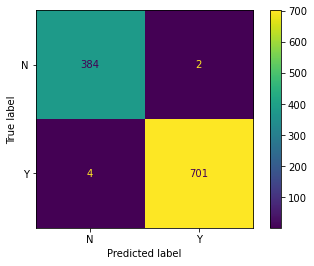

In [142]:
from sklearn.metrics import plot_confusion_matrix  #use this method
plot_confusion_matrix(model_log, X_train_df, y_train)

In [143]:
df_simple.columns

Index(['Sttr Student Load', 'Sttr Cmpl Cred', 'alt_id', 'Cohort', 'FA3 Major',
       'Graduated', 'Grad Major', 'ffall_gpa'],
      dtype='object')